# Assignment: Classification

## Author

- Name:		**Harshit Raj**  
- Email		**harshitr20@iitk.ac.in**  
- Roll No:	**200433**  
- Date:		**April 21, 2020**  

## About

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




In [15]:
# Setup
print ("Setting up!")

# install libraries
!pip install nltk numpy nltk matplotlib sklearn

# download stopwords
import nltk
nltk.download('stopwords')

print ("You're ready!")

Setting up!
You're ready!


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/salazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [16]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

vocab = []

# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(inp):
  inp = inp.replace('_','')
  inp = inp.strip().lower()
  return inp.split()
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(lisword):
  ps = PorterStemmer()
  return [ps.stem(word) for word in lisword]

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(lisstem):
  swords = set(stopwords.words('english'))
  return [word for word in lisstem if word not in swords]

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(inp, vocab):
  for word in inp:
    if word not in vocab:
      vocab.append(word)

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stemwords, vocab):
  out = []
  for word in vocab:
    if word in stemwords:
      out.append(1)
    else:
      out.append(0)
  return out

def text_to_bow(inp, vocab):
  d = inp.split(',')
  em = read_email(d[0])
  em = stemming(em)
  em = remove_stop_words(em)
  build_vocabulary(em, vocab)
  bow = get_bow(em, vocab)
  bow = np.array(bow)
  return (bow,int(d[1].strip()))

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data(vocab):
  f = open('spam_or_not_spam.csv', 'r')
  data = f.readlines()
  data = data[1:]
  data = [text_to_bow(dp, vocab) for dp in data]
  x = len(data[-1][0])
  data = [(np.pad(dp[0],(0,x-len(dp[0])),'constant'),dp[1]) for dp in data]
  return data

data = read_data(vocab)
print ("Data pre-processing Done!")
print ("Read {} emails".format(len(data)))

Data pre-processing Done!
Read 3000 emails


### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

Total 25429 words
Plot of words from all emails:


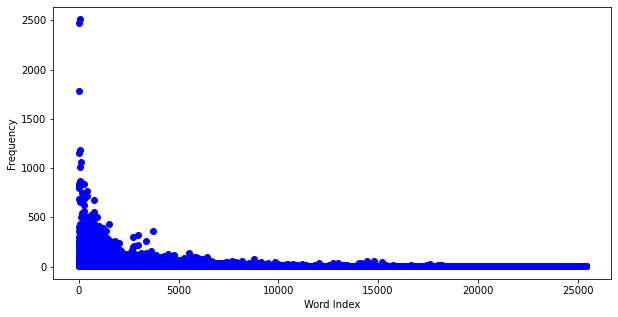

Plot of words from non-spam emails:


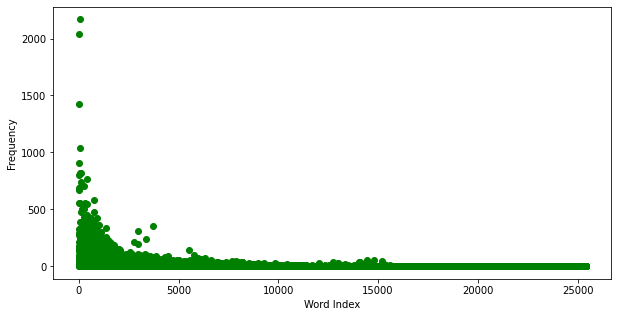

Plot of words from spam emails:


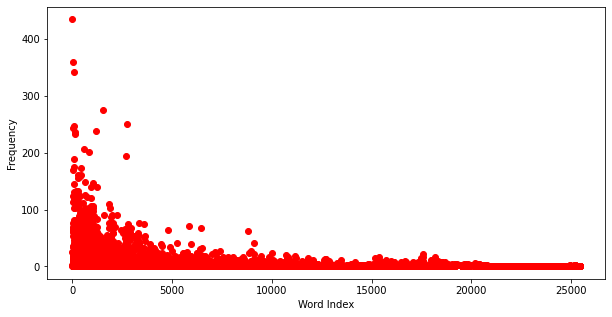

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# show data distribution
def show_data_distribution(data, colorr):
  plt.figure(figsize=(10,5))
  plt.scatter(range(len(data)), data, color=colorr)
  plt.xlabel('Word Index')
  plt.ylabel('Frequency')
  plt.show()

# visuallze data distribution
def data_vis(data):
  all = np.zeros(len(data[0][0]))
  spam = np.zeros(len(data[0][0]))
  notspam = np.zeros(len(data[0][0]))

  for dp in data:
    if dp[1] == 0:
      notspam = np.add(notspam, dp[0])
      all = np.add(all, dp[0])
    else:
      spam = np.add(spam, dp[0])
      all = np.add(all, dp[0])
  
  print ("Total" , len(all), "words")
  
  # Plot of words from all emails
  print ("Plot of words from all emails:")
  show_data_distribution(all, 'blue')
  
  # Plot of words from non-spam emails
  print ("Plot of words from non-spam emails:")
  show_data_distribution(notspam, 'green')
  
  # Plot of words from spam emails
  print ("Plot of words from spam emails:")
  show_data_distribution(spam, 'red')

  return

data_vis(data)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import numpy as np

# split dataset
def split(data):
  np.random.shuffle(data)
  train = data[:int(len(data)*0.8)]
  test = data[int(len(data)*0.8):]
  print ("Data shuffled and split into train and test...")
  return train, test

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data, test_data):
  clf = svm.SVC(gamma='scale')
  clf.fit([x[0] for x in train_data], [x[1] for x in train_data])
  predict_labels0 = clf.predict([x[0] for x in train_data])
  predict_labels = clf.predict([x[0] for x in test_data])
  print ("SVM predictions complete!")
  return predict_labels0, predict_labels

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data, test_data):
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit([x[0] for x in train_data], [x[1] for x in train_data])
  predict_labels0 = clf.predict([x[0] for x in train_data])
  predict_labels = clf.predict([x[0] for x in test_data])
  print ("KNN predictions complete!")
  return predict_labels0, predict_labels

train_data, test_data = split(data)
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data)

Data shuffled and split into train and test...
SVM predictions complete!
KNN predictions complete!


### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [19]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
  return metrics.accuracy_score(true_labels, predicted_labels)

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
  return metrics.roc_auc_score(true_labels, predicted_labels)

# write code to print train and test accuracy and AUC score of SVM and k-NN classifier

print ("SVM train accuracy: ", compute_accuracy(svm_train_predictions, [x[1] for x in train_data]))
print ("SVM test accuracy: ", compute_accuracy(svm_test_predictions, [x[1] for x in test_data]))
print ("SVM AUC score: ", compute_auc(svm_test_predictions, [x[1] for x in test_data]))

print ()

print ("KNN train accuracy: ", compute_accuracy(knn_train_predictions, [x[1] for x in train_data]))
print ("KNN test accuracy: ", compute_accuracy(knn_test_predictions, [x[1] for x in test_data]))
print ("KNN AUC score: ", compute_auc(knn_test_predictions, [x[1] for x in test_data]))

SVM train accuracy:  0.9945833333333334
SVM test accuracy:  0.97
SVM AUC score:  0.9826254826254825

KNN train accuracy:  0.9370833333333334
KNN test accuracy:  0.8316666666666667
KNN AUC score:  0.7321614706718469
